In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

data = pd.read_csv("C:\\Users\\user\\Documents\\project_ML\\Sleep_health_and_lifestyle_dataset.csv")
data.head()
data.shape
data.info()
data.describe()
# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

<Axes: xlabel='Sleep Disorder', ylabel='count'>

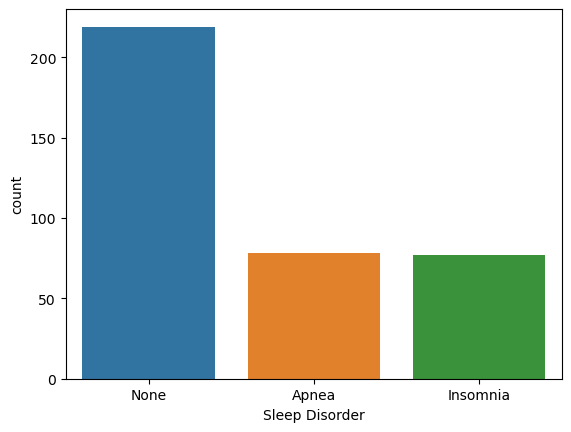

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pandas.plotting import scatter_matrix

data = pd.read_csv("C:\\Users\\user\\Documents\\project_ML\\Sleep_health_and_lifestyle_dataset.csv")

sns.countplot(x='Sleep Disorder', data=data)
#sns.heatmap(data.corr(), annot=True)
#scatter_matrix(data, figsize=(20,20))
#data['Sleep Disorder'].hist()
#plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_1544\1195128693.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

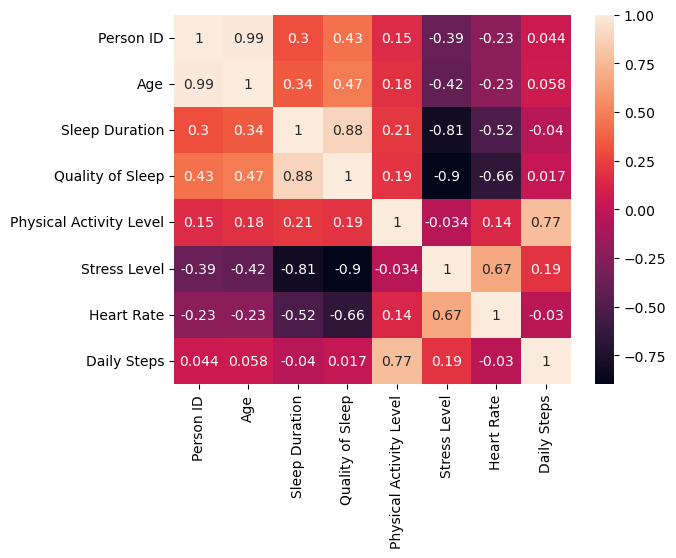

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pandas.plotting import scatter_matrix

data = pd.read_csv("C:\\Users\\user\\Documents\\project_ML\\Sleep_health_and_lifestyle_dataset.csv")

#sns.countplot(x='Sleep Disorder', data=data)
sns.heatmap(data.corr(), annot=True)
#scatter_matrix(data, figsize=(20,20))
#data['Sleep Disorder'].hist()
#plt.show()

array([[<Axes: xlabel='Person ID', ylabel='Person ID'>,
        <Axes: xlabel='Age', ylabel='Person ID'>,
        <Axes: xlabel='Sleep Duration', ylabel='Person ID'>,
        <Axes: xlabel='Quality of Sleep', ylabel='Person ID'>,
        <Axes: xlabel='Physical Activity Level', ylabel='Person ID'>,
        <Axes: xlabel='Stress Level', ylabel='Person ID'>,
        <Axes: xlabel='Heart Rate', ylabel='Person ID'>,
        <Axes: xlabel='Daily Steps', ylabel='Person ID'>],
       [<Axes: xlabel='Person ID', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Sleep Duration', ylabel='Age'>,
        <Axes: xlabel='Quality of Sleep', ylabel='Age'>,
        <Axes: xlabel='Physical Activity Level', ylabel='Age'>,
        <Axes: xlabel='Stress Level', ylabel='Age'>,
        <Axes: xlabel='Heart Rate', ylabel='Age'>,
        <Axes: xlabel='Daily Steps', ylabel='Age'>],
       [<Axes: xlabel='Person ID', ylabel='Sleep Duration'>,
        <Axes: xlabel='Age', ylabel='

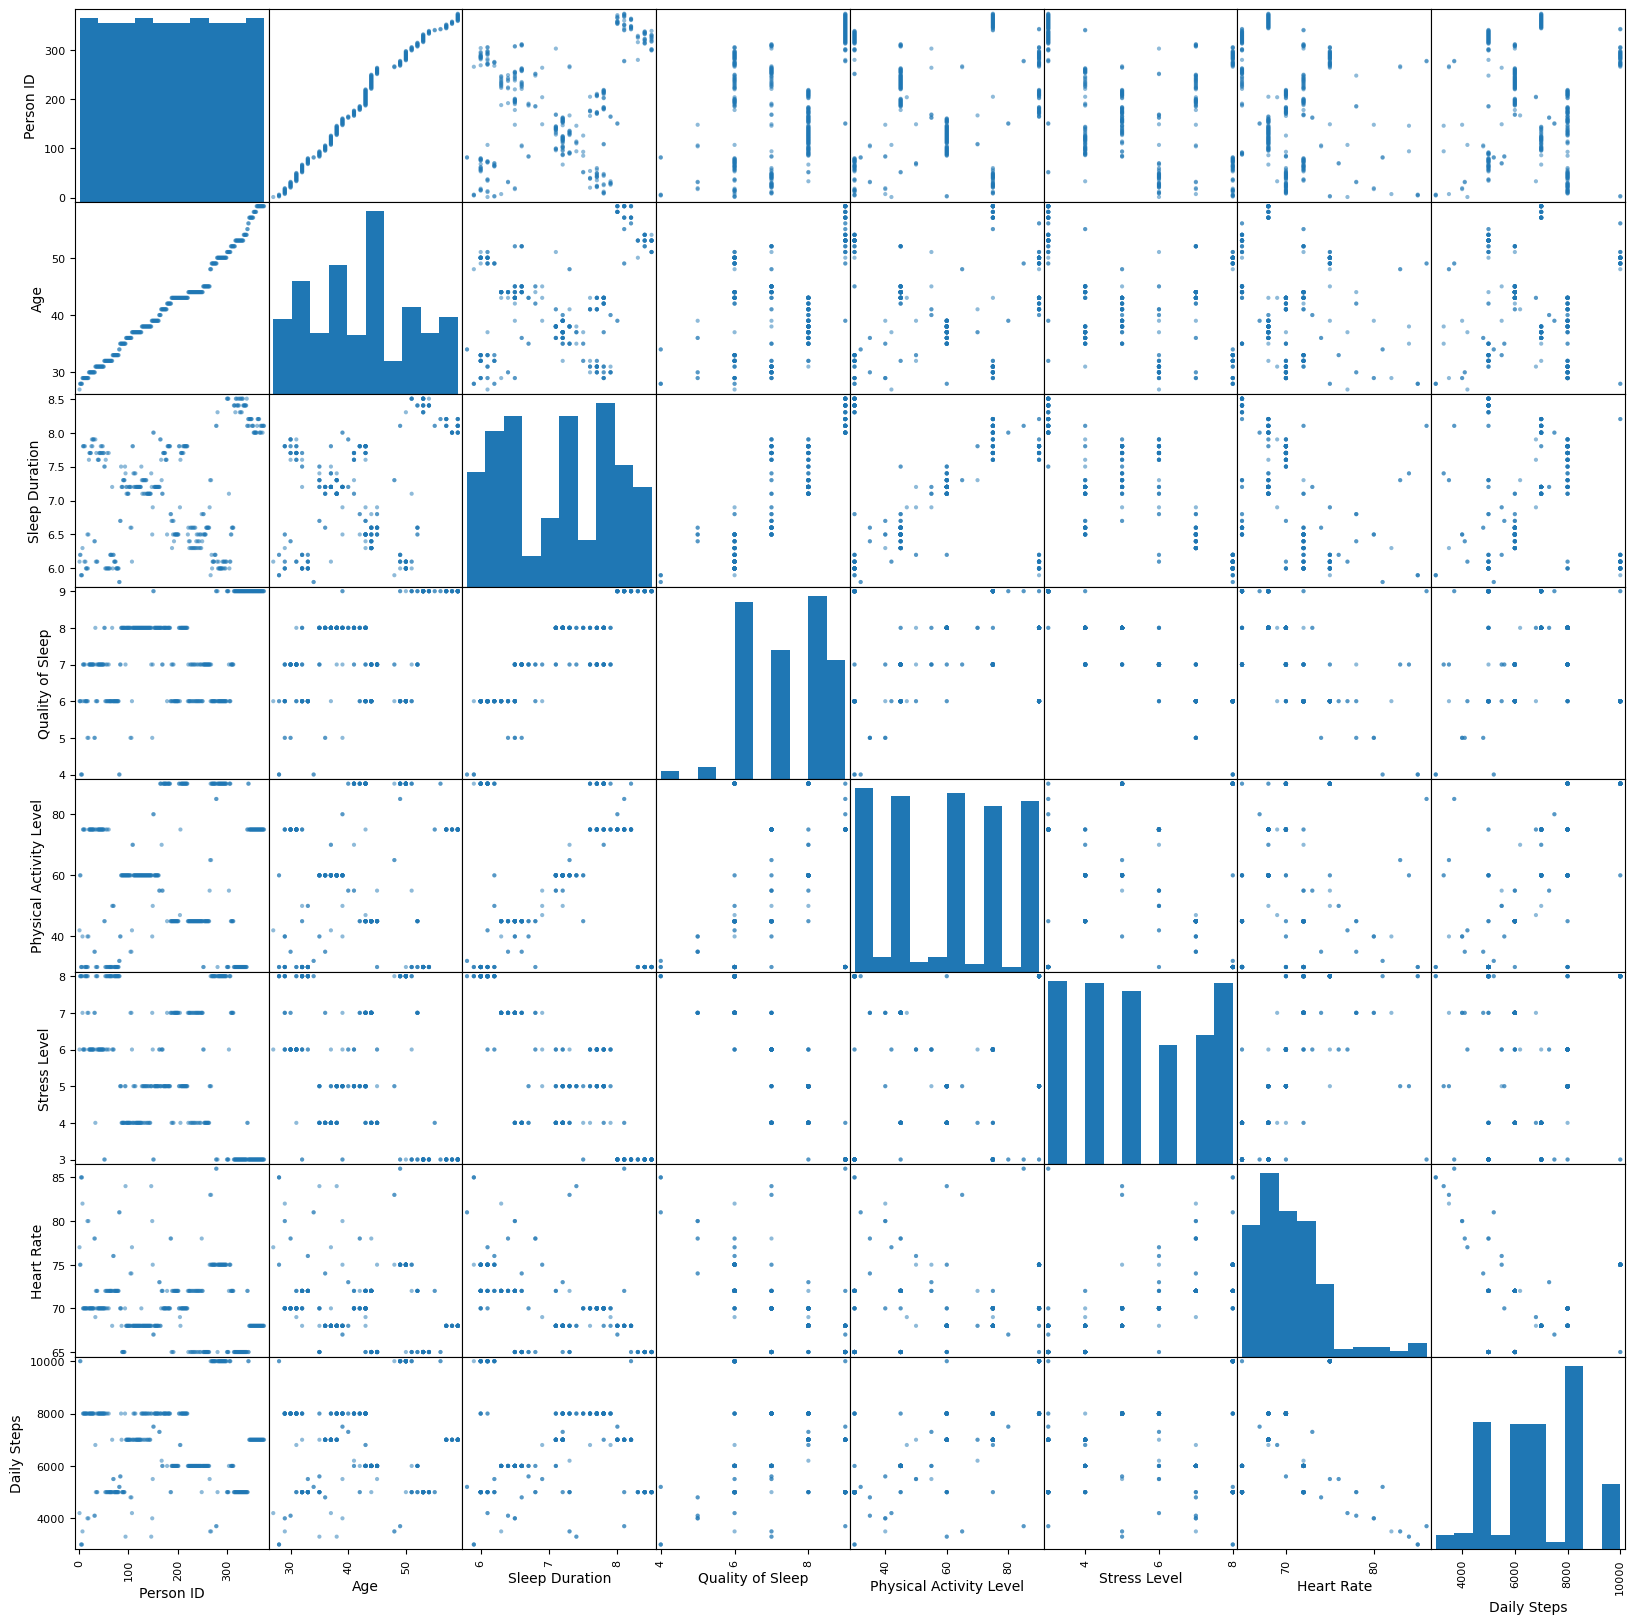

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pandas.plotting import scatter_matrix

data = pd.read_csv("C:\\Users\\user\\Documents\\project_ML\\Sleep_health_and_lifestyle_dataset.csv")

#sns.countplot(x='Sleep Disorder', data=data)
#sns.heatmap(data.corr(), annot=True)
scatter_matrix(data, figsize=(20,20))
#data['Sleep Disorder'].hist()
#plt.show()

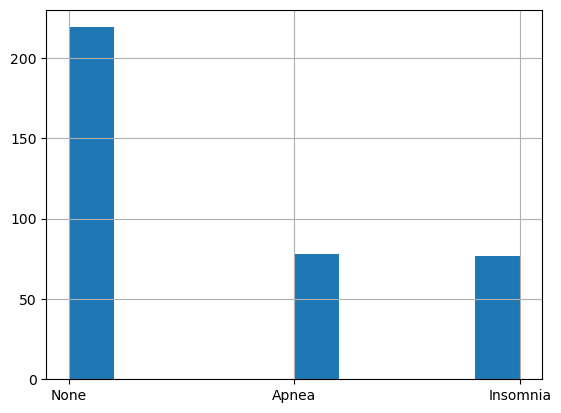

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pandas.plotting import scatter_matrix

data = pd.read_csv("C:\\Users\\user\\Documents\\project_ML\\Sleep_health_and_lifestyle_dataset.csv")

#sns.countplot(x='Sleep Disorder', data=data)
#sns.heatmap(data.corr(), annot=True)
#scatter_matrix(data, figsize=(20,20))
data['Sleep Disorder'].hist()
plt.show()

In [27]:
#Number one:
# import pandas as pd
import pandas as pd
# Loading the dataset
data = pd.read_csv("C:\\Users\\user\\Documents\\project_ML\\Sleep_health_and_lifestyle_dataset.csv")

# Check for duplicate rows
print("Duplicate rows are:")
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)

# Convert categorical variables into numerical variables
data = pd.get_dummies(data, columns=['Gender','Occupation','Quality of Sleep','BMI Category','Blood Pressure','Sleep Disorder'])

# Discretize the continuous variables
data['Age'] = pd.cut(data['Age'], bins=4, labels=False)
data['Sleep Duration'] = pd.cut(data['Sleep Duration'], bins=3, labels=False)
data['Physical Activity Level'] = pd.cut(data['Physical Activity Level'], bins=4, labels=False)
data['Stress Level'] = pd.cut(data['Stress Level'], bins=3, labels=False)
data['Heart Rate'] = pd.cut(data['Heart Rate'], bins=4, labels=False)
data['Daily Steps'] = pd.cut(data['Daily Steps'], bins=4, labels=False)

# Saving it
data.to_csv("C:\\Users\\user\\Documents\\project_ML\\Data_preprocessing.csv", index=False)

Duplicate rows are:
0


In [1]:
!pip install mlxtend

In [28]:
import mlxtend 
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = pd.read_csv("C:\\Users\\user\\Documents\\project_ML\\Sleep_health_and_lifestyle_dataset.csv")

# Convert the dataset into a list of transactions
transactions = []
for i in range(data.shape[0]):
    transactions.append([str(item) for item in data.loc[i, :] if pd.notna(item)])

# Convert the transactions into a one-hot encoded format
trse = TransactionEncoder()
onehot = trse.fit_transform(transactions)

# Convert the one-hot encoded format into a pandas DataFrame
DF = pd.DataFrame(onehot, columns=trse.columns_)

# Use the Apriori algorithm to generate frequent itemsets
frequent_itemsets = apriori(DF, min_support=0.09, use_colnames=True)

# Use the association_rules function to generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter the rules based on support, confidence, and lift to get the strong rules
strong_rules = rules[(rules['support'] >= 0.01) &
                     (rules['confidence'] >= 0.3)&
                     (rules['lift'] >= 1.5)]

# Print the strong rules
print(strong_rules)

       antecedents                                    consequents  \
0          (10000)                                            (6)   
2          (10000)                                           (75)   
3             (75)                                        (10000)   
5          (10000)                                            (8)   
6             (90)                                        (10000)   
...            ...                                            ...   
18361  (5, Lawyer)          (8, Normal, Male, None, 8000, 130/85)   
18366       (8000)     (8, Normal, Male, None, 130/85, 5, Lawyer)   
18367     (130/85)       (8, Normal, Male, None, 8000, 5, Lawyer)   
18368          (5)  (8, Normal, Male, None, 8000, 130/85, Lawyer)   
18369     (Lawyer)       (8, Normal, Male, None, 8000, 130/85, 5)   

       antecedent support  consequent support   support  confidence      lift  \
0                0.096257            0.395722  0.090909    0.944444  2.386637   
2        

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Load the dataset into a pandas dataframe
DF = pd.read_csv("C:\\Users\\user\\Documents\\project_ML\\Sleep_health_and_lifestyle_dataset.csv")
# Encode the categorical columns into numeric using LabelEncoder
labelencoder = LabelEncoder()

DF['Gender'] = labelencoder.fit_transform(DF['Gender'])
DF['Age'] = labelencoder.fit_transform(DF['Age'])
DF['Occupation'] = labelencoder.fit_transform(DF['Occupation'])
DF['Sleep Duration'] = labelencoder.fit_transform(DF['Sleep Duration'])
DF['Quality of Sleep'] = labelencoder.fit_transform(DF['Quality of Sleep'])
DF['Physical Activity Level'] = labelencoder.fit_transform(DF['Physical Activity Level'])
DF['Stress Level'] = labelencoder.fit_transform(DF['Stress Level'])
DF['BMI Category'] = labelencoder.fit_transform(DF['BMI Category'])
DF['Blood Pressure'] = labelencoder.fit_transform(DF['Blood Pressure'])
DF['Daily Steps'] = labelencoder.fit_transform(DF['Daily Steps'])
DF['Sleep Disorder'] = labelencoder.fit_transform(DF['Sleep Disorder'])
# Save the preprocessed data into a new csv file
DF.to_csv("C:\\Users\\user\\Documents\\project_ML\\Data_preprocessing.csv", index=False)

In [90]:
#Number 2
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset into a pandas dataframe
DF = pd.read_csv("C:\\Users\\user\\Documents\\project_ML\\Data_preprocessing.csv")

# Split the dataset into training and test sets
A = DF.drop('Sleep Disorder',axis=1)
B = DF['Sleep Disorder']

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

# Save the training and test sets into separate csv files
A_train.to_csv('C:\\Users\\user\\Documents\\project_ML\\A_train.csv', index=False)
B_train.to_csv('C:\\Users\\user\\Documents\\project_ML\\B_train.csv', index=False)
A_test.to_csv('C:\\Users\\user\\Documents\\project_ML\\A_test.csv', index=False)
B_test.to_csv('C:\\Users\\user\\Documents\\project_ML\\B_test.csv', index=False)

C:\Users\user\AppData\Local\Temp\ipykernel_1544\735409741.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  B_train_LGR = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_train.csv', header=None, squeeze=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1544\735409741.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  B_test_LGR = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_test.csv', header=None, squeeze=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docum

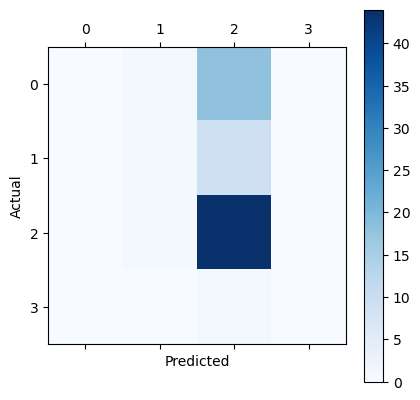

                precision    recall  f1-score   support

             0       0.00      0.00      0.00        19
             1       0.33      0.10      0.15        10
             2       0.61      0.98      0.75        45
Sleep Disorder       0.00      0.00      0.00         1

      accuracy                           0.60        75
     macro avg       0.24      0.27      0.23        75
  weighted avg       0.41      0.60      0.47        75

Training set accuracy: 0.582
Test set accuracy: 0.600


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the training and test sets into pandas dataframes
A_train_LGR = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\A_train.csv')
B_train_LGR = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_train.csv', header=None, squeeze=True)
A_test_LGR = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\A_test.csv')
B_test_LGR = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_test.csv', header=None, squeeze=True)

# Remove columns that are non-numeric
#A_train = A_train.select_dtypes(include='number')
#A_test = A_test.select_dtypes(include='number')

# Fix mismatches between A_train and B_train
missing_rows_train = set(A_train_LGR.index) - set(B_train_LGR.index)
extra_rows_train = set(B_train_LGR.index) - set(A_train_LGR.index)
B_train_LGR = B_train_LGR.drop(extra_rows_train)
for row in missing_rows_train:
    B_train_LGR.loc[row] = -1
B_train_LGR = B_train_LGR.sort_index()

# Fix mismatches between A_test and B_test
missing_rows_test = set(A_test_LGR.index) - set(B_test_LGR.index)
extra_rows_test = set(B_test_LGR.index) - set(A_test_LGR.index)
B_test_LGR = B_test_LGR.drop(extra_rows_test)
for row in missing_rows_test:
    B_test_LGR.loc[row] = -1
B_test_LGR = B_test_LGR.sort_index()

# Build the decision tree classifier using default parameters
clf = LogisticRegression()
clf.fit(A_train_LGR, B_train_LGR)

# Generate the confusion matrix and visualize it using Matplotlib
B_pred_LGR = clf.predict(A_test_LGR)
conf_m = confusion_matrix(B_test_LGR, B_pred_LGR)
plt.matshow(conf_m, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate the classification report
print(classification_report(B_test_LGR, B_pred_LGR))

# Compare the performance scores on the test and training sets
train_score = clf.score(A_train_LGR, B_train_LGR)
test_score = clf.score(A_test_LGR, B_test_LGR)
print(f'Training set accuracy: {train_score:.3f}')
print(f'Test set accuracy: {test_score:.3f}')

C:\Users\user\AppData\Local\Temp\ipykernel_1544\3674497793.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  B_train_KNN = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_train.csv', header=None, squeeze=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1544\3674497793.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  B_test_KNN = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_test.csv', header=None, squeeze=True)


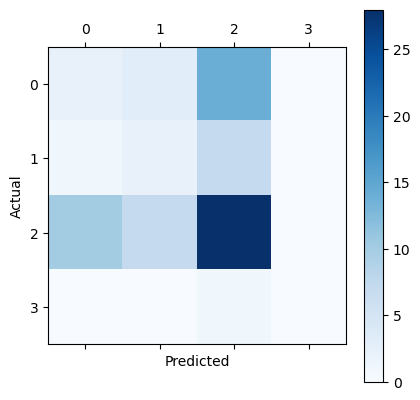

                precision    recall  f1-score   support

             0       0.15      0.11      0.12        19
             1       0.17      0.20      0.18        10
             2       0.56      0.62      0.59        45
Sleep Disorder       0.00      0.00      0.00         1

      accuracy                           0.43        75
     macro avg       0.22      0.23      0.22        75
  weighted avg       0.40      0.43      0.41        75

Training set accuracy: 0.592
Test set accuracy: 0.427


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the training and test sets into pandas dataframes
A_train_KNN = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\A_train.csv')
B_train_KNN = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_train.csv', header=None, squeeze=True)
A_test_KNN = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\A_test.csv')
B_test_KNN = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_test.csv', header=None, squeeze=True)

# Remove columns that are non-numeric
#A_train = A_train.select_dtypes(include='number')
#A_test = A_test.select_dtypes(include='number')

# Fix mismatches between A_train and B_train
missing_rows_train = set(A_train_KNN.index) - set(B_train_KNN.index)
extra_rows_train = set(B_train_KNN.index) - set(A_train_KNN.index)
B_train_KNN = B_train_KNN.drop(extra_rows_train)
for row in missing_rows_train:
    B_train_KNN.loc[row] = -1
B_train_KNN = B_train_KNN.sort_index()

# Fix mismatches between A_test and B_test
missing_rows_test = set(A_test_KNN.index) - set(B_test_KNN.index)
extra_rows_test = set(B_test_KNN.index) - set(A_test_KNN.index)
B_test_KNN = B_test_KNN.drop(extra_rows_test)
for row in missing_rows_test:
    B_test_KNN.loc[row] = -1
B_test_KNN = B_test_KNN.sort_index()

# Build the decision tree classifier using default parameters
clf = KNeighborsClassifier()
clf.fit(A_train_KNN, B_train_KNN)

# Generate the confusion matrix and visualize it using Matplotlib
B_pred_KNN = clf.predict(A_test_KNN)
conf_m = confusion_matrix(B_test_KNN, B_pred_KNN)
plt.matshow(conf_m, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate the classification report
print(classification_report(B_test_KNN, B_pred_KNN))

# Compare the performance scores on the test and training sets
train_score = clf.score(A_train_KNN, B_train_KNN)
test_score = clf.score(A_test_KNN, B_test_KNN)
print(f'Training set accuracy: {train_score:.3f}')
print(f'Test set accuracy: {test_score:.3f}')

C:\Users\user\AppData\Local\Temp\ipykernel_1544\1361166267.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  B_train_SVC = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_train.csv', header=None, squeeze=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1544\1361166267.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  B_test_SVC = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_test.csv', header=None, squeeze=True)


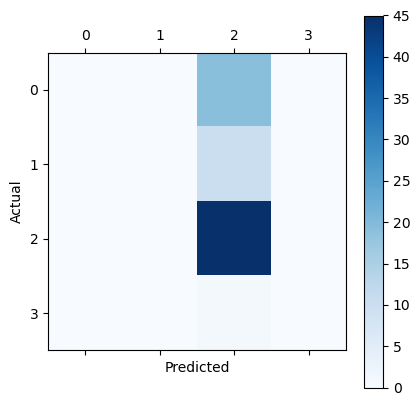

                precision    recall  f1-score   support

             0       0.00      0.00      0.00        19
             1       0.00      0.00      0.00        10
             2       0.60      1.00      0.75        45
Sleep Disorder       0.00      0.00      0.00         1

      accuracy                           0.60        75
     macro avg       0.15      0.25      0.19        75
  weighted avg       0.36      0.60      0.45        75

Training set accuracy: 0.575
Test set accuracy: 0.600


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the training and test sets into pandas dataframes
A_train_SVC = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\A_train.csv')
B_train_SVC = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_train.csv', header=None, squeeze=True)
A_test_SVC = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\A_test.csv')
B_test_SVC = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_test.csv', header=None, squeeze=True)

# Remove columns that are non-numeric
#A_train = A_train.select_dtypes(include='number')
#A_test = A_test.select_dtypes(include='number')

# Fix mismatches between A_train and B_train
missing_rows_train = set(A_train_SVC.index) - set(B_train_SVC.index)
extra_rows_train = set(B_train_SVC.index) - set(A_train_SVC.index)
B_train_SVC = B_train_SVC.drop(extra_rows_train)
for row in missing_rows_train:
    B_train_SVC.loc[row] = -1
B_train_SVC = B_train_SVC.sort_index()

# Fix mismatches between A_test and B_test
missing_rows_test = set(A_test_SVC.index) - set(B_test_SVC.index)
extra_rows_test = set(B_test_SVC.index) - set(A_test_SVC.index)
B_test_SVC = B_test_SVC.drop(extra_rows_test)
for row in missing_rows_test:
    B_test_SVC.loc[row] = -1
B_test_SVC = B_test_SVC.sort_index()

# Build the decision tree classifier using default parameters
clf = SVC()
clf.fit(A_train_SVC, B_train_SVC)

# Generate the confusion matrix and visualize it using Matplotlib
B_pred_SVC = clf.predict(A_test_SVC)
conf_m = confusion_matrix(B_test_SVC, B_pred_SVC)
plt.matshow(conf_m, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate the classification report
print(classification_report(B_test_SVC, B_pred_SVC))

# Compare the performance scores on the test and training sets
train_score = clf.score(A_train_SVC, B_train_SVC)
test_score = clf.score(A_test_SVC, B_test_SVC)
print(f'Training set accuracy: {train_score:.3f}')
print(f'Test set accuracy: {test_score:.3f}')

C:\Users\user\AppData\Local\Temp\ipykernel_1544\1475230454.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  B_train_Bayes = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_train.csv', header=None, squeeze=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1544\1475230454.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  B_test_Bayes = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_test.csv', header=None, squeeze=True)


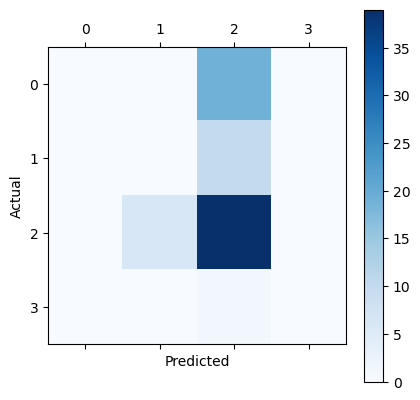

                precision    recall  f1-score   support

             0       0.00      0.00      0.00        19
             1       0.00      0.00      0.00        10
             2       0.57      0.87      0.68        45
Sleep Disorder       0.00      0.00      0.00         1

      accuracy                           0.52        75
     macro avg       0.14      0.22      0.17        75
  weighted avg       0.34      0.52      0.41        75

Training set accuracy: 0.569
Test set accuracy: 0.520


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the training and test sets into pandas dataframes
A_train_Bayes = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\A_train.csv')
B_train_Bayes = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_train.csv', header=None, squeeze=True)
A_test_Bayes = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\A_test.csv')
B_test_Bayes = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_test.csv', header=None, squeeze=True)

# Remove columns that are non-numeric
#A_train = A_train.select_dtypes(include='number')
#A_test = A_test.select_dtypes(include='number')

# Fix mismatches between A_train and B_train
missing_rows_train = set(A_train_Bayes.index) - set(B_train_Bayes.index)
extra_rows_train = set(B_train_Bayes.index) - set(A_train_Bayes.index)
B_train_Bayes = B_train_Bayes.drop(extra_rows_train)
for row in missing_rows_train:
    B_train_Bayes.loc[row] = -1
B_train_Bayes = B_train_Bayes.sort_index()

# Fix mismatches between A_test and B_test
missing_rows_test = set(A_test_Bayes.index) - set(B_test_Bayes.index)
extra_rows_test = set(B_test_Bayes.index) - set(A_test_Bayes.index)
B_test_Bayes = B_test_Bayes.drop(extra_rows_test)
for row in missing_rows_test:
    B_test_Bayes.loc[row] = -1
B_test_Bayes = B_test_Bayes.sort_index()

# Build the decision tree classifier using default parameters
clf = GaussianNB()
clf.fit(A_train_Bayes, B_train_Bayes)

# Generate the confusion matrix and visualize it using Matplotlib
B_pred_Bayes = clf.predict(A_test_Bayes)
conf_m = confusion_matrix(B_test_Bayes, B_pred_Bayes)
plt.matshow(conf_m, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate the classification report
print(classification_report(B_test_Bayes, B_pred_Bayes))

# Compare the performance scores on the test and training sets
train_score = clf.score(A_train_Bayes, B_train_Bayes)
test_score = clf.score(A_test_Bayes, B_test_Bayes)
print(f'Training set accuracy: {train_score:.3f}')
print(f'Test set accuracy: {test_score:.3f}')

C:\Users\user\AppData\Local\Temp\ipykernel_1544\3020150762.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  B_train_Tree = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_train.csv', header=None, squeeze=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1544\3020150762.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  B_test_Tree = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_test.csv', header=None, squeeze=True)


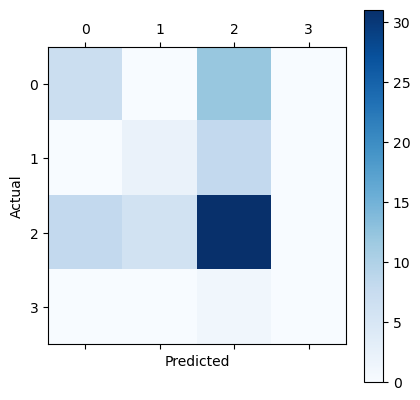

                precision    recall  f1-score   support

             0       0.47      0.37      0.41        19
             1       0.25      0.20      0.22        10
             2       0.60      0.69      0.64        45
Sleep Disorder       0.00      0.00      0.00         1

      accuracy                           0.53        75
     macro avg       0.33      0.31      0.32        75
  weighted avg       0.51      0.53      0.52        75

Training set accuracy: 1.000
Test set accuracy: 0.533


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the training and test sets into pandas dataframes
A_train_Tree = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\A_train.csv')
B_train_Tree = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_train.csv', header=None, squeeze=True)
A_test_Tree = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\A_test.csv')
B_test_Tree = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_test.csv', header=None, squeeze=True)

# Remove columns that are non-numeric
#A_train = A_train.select_dtypes(include='number')
#A_test = A_test.select_dtypes(include='number')

# Fix mismatches between A_train and B_train
missing_rows_train = set(A_train_Tree.index) - set(B_train_Tree.index)
extra_rows_train = set(B_train_Tree.index) - set(A_train_Tree.index)
B_train_Tree = B_train_Tree.drop(extra_rows_train)
for row in missing_rows_train:
    B_train_Tree.loc[row] = -1
B_train_Tree = B_train_Tree.sort_index()

# Fix mismatches between A_test and B_test
missing_rows_test = set(A_test_Tree.index) - set(B_test_Tree.index)
extra_rows_test = set(B_test_Tree.index) - set(A_test_Tree.index)
B_test_Tree = B_test_Tree.drop(extra_rows_test)
for row in missing_rows_test:
    B_test_Tree.loc[row] = -1
B_test_Tree = B_test_Tree.sort_index()

# Build the decision tree classifier using default parameters
clf = DecisionTreeClassifier()
clf.fit(A_train_Tree, B_train_Tree)

# Generate the confusion matrix and visualize it using Matplotlib
B_pred_Tree = clf.predict(A_test_Tree)
conf_m = confusion_matrix(B_test_Tree, B_pred_Tree)
plt.matshow(conf_m, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate the classification report
print(classification_report(B_test_Tree, B_pred_Tree))

# Compare the performance scores on the test and training sets
train_score = clf.score(A_train_Tree, B_train_Tree)
test_score = clf.score(A_test_Tree, B_test_Tree)
print(f'Training set accuracy: {train_score:.3f}')
print(f'Test set accuracy: {test_score:.3f}')

C:\Users\user\AppData\Local\Temp\ipykernel_1544\178660266.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  B_train_Forest = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_train.csv', header=None, squeeze=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1544\178660266.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  B_test_Forest = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_test.csv', header=None, squeeze=True)


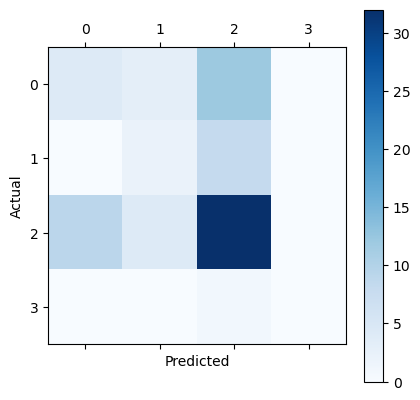

                precision    recall  f1-score   support

             0       0.31      0.21      0.25        19
             1       0.22      0.20      0.21        10
             2       0.60      0.71      0.65        45
Sleep Disorder       0.00      0.00      0.00         1

      accuracy                           0.51        75
     macro avg       0.28      0.28      0.28        75
  weighted avg       0.47      0.51      0.48        75

Training set accuracy: 1.000
Test set accuracy: 0.507


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the training and test sets into pandas dataframes
A_train_Forest = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\A_train.csv')
B_train_Forest = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_train.csv', header=None, squeeze=True)
A_test_Forest = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\A_test.csv')
B_test_Forest = pd.read_csv('C:\\Users\\user\\Documents\\project_ML\\B_test.csv', header=None, squeeze=True)

# Remove columns that are non-numeric
#A_train = A_train.select_dtypes(include='number')
#A_test = A_test.select_dtypes(include='number')

# Fix mismatches between A_train and B_train
missing_rows_train = set(A_train_Forest.index) - set(B_train_Forest.index)
extra_rows_train = set(B_train_Forest.index) - set(A_train_Forest.index)
B_train_Forest = B_train_Forest.drop(extra_rows_train)
for row in missing_rows_train:
    B_train_Forest.loc[row] = -1
B_train_Forest = B_train_Forest.sort_index()

# Fix mismatches between A_test and B_test
missing_rows_test = set(A_test_Forest.index) - set(B_test_Forest.index)
extra_rows_test = set(B_test_Forest.index) - set(A_test_Forest.index)
B_test_Forest = B_test_Forest.drop(extra_rows_test)
for row in missing_rows_test:
    B_test_Forest.loc[row] = -1
B_test_Forest = B_test_Forest.sort_index()

# Build the decision tree classifier using default parameters
clf = RandomForestClassifier()
clf.fit(A_train_Forest, B_train_Forest)

# Generate the confusion matrix and visualize it using Matplotlib
B_pred_Forest = clf.predict(A_test_Forest)
conf_m = confusion_matrix(B_test_Forest, B_pred_Forest)
plt.matshow(conf_m, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate the classification report
print(classification_report(B_test_Forest, B_pred_Forest))

# Compare the performance scores on the test and training sets
train_score = clf.score(A_train_Forest, B_train_Forest)
test_score = clf.score(A_test_Forest, B_test_Forest)
print(f'Training set accuracy: {train_score:.3f}')
print(f'Test set accuracy: {test_score:.3f}')

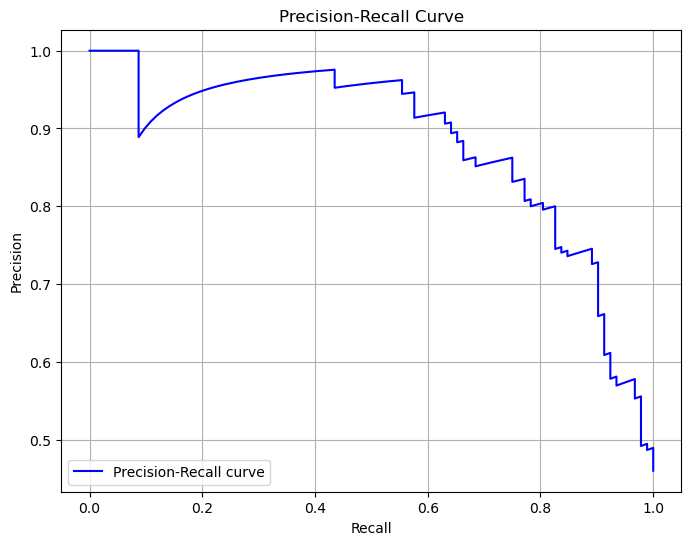

Training accuracy: 0.8475
Test accuracy: 0.82
Execution time: 0.0030007362365722656 seconds


In [164]:
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve

# Generate a synthetic dataset for demonstration
A, B = make_classification(n_samples=1000, n_features=12, n_classes=2, random_state=42)

# Split the data into training and test sets
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

# Fit the GaussianNB classifier
start_time = time.time()
gnb = GaussianNB()
gnb.fit(A_train, B_train)
end_time = time.time()

# Calculate probabilities for positive class (class 1)
B_probs = gnb.predict_proba(A_test)[:, 1]

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(B_test, B_probs)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


train_accuracy = accuracy_score(B_train, gnb.predict(A_train))
test_accuracy = accuracy_score(B_test, gnb.predict(A_test))

print(f'Training accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')
print(f'Execution time: {end_time - start_time} seconds')